## Assignment 04 Summary

There are four questions with the details given below.

* Question 1: nfa2dfa and related exercises

* Question 2: Understanding DFA utilities

* Question 3: Understanding re2nfa

* Question 4: Understanding del_gnfa_states

## All required answers are indicated by tags " {Answer cells below}" sprinkled throughout this notebook. This means that you must fill those cells below with your answer. This is to guide you to locate where questions are being asked. Even if I don't provide this tag everywhere (impossible), there will be explicit questions in the notebook which you are supposed to answer.


# Imports


In [3]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.Def_NFA2RE import *
from jove.Def_RE2NFA import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4875, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 4875 (delta 144), reused 160 (delta 71), pack-reused 4634
Receiving objects: 100% (4875/4875), 7.56 MiB | 25.29 MiB/s, done.
Resolving deltas: 100% (3149/3149), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)

## Question 1: nfa2dfa and related exercises

    * Take a given nfa called nfa1 (below).
    
    * Now convert nfa1 to dfa1, applying the subset construction algorithm. Part of this construction has been done for you to tell you the state-naming conventions to be followed. Finish the rest of the work as per these state naming conventions.
    
    * Now apply Brzozowski's minimization to dfa1 as a one-line expression involving the appropriate Jove functions (find out from the book). Show a line (or two) of code showing the Brzozowski algorithm and its function calls used in a line (or two). Call the result min_dfa1. You should not need more than 1-2 lines but keep it short (exceeding by a few lines is fine).
    
    * Now show that dfa1 and min_dfa1 are language-equivalent but not isomorphic. Refer to https://en.wikipedia.org/wiki/Graph_isomorphism and first define isomorphism clearly in a few bullets, explaining (using the graphs G and H provided in the Wikipedia article) why those "different-looking graphs" are isomorphic. Then explain why dfa1 and min_dfa1 fail the isomorphism test by arguing whether a function similar to "f" in this Wikipedia article exists or not.

## The NFA nfa1 is below

In [4]:
# Given NFA

nfa1 = md2mc('''NFA
I1 : '' -> B
I1 : a  -> I2

I2 : c  -> F3
I2 : b  -> B

B : a  -> B
B : b  -> F4
B : c  -> F3


''')


Generating LALR tables


### {Answer cells below - show the NFA}

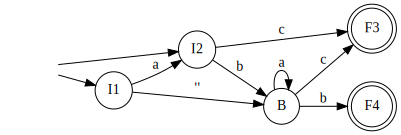

In [6]:
dotObj_nfa(nfa1)

### Convert the given NFA to a DFA by hand. List the steps you made in bullet points.

### Part of the answer is filled in. Fill the missing parts shown as [fill here] below.

### {Answer cells below -  list the steps that obtain the DFA - some parts given - fill the rest}

I say "FILL HERE" below. Fill those.

Answer:  


* Let EC stand for EClosure and BH denote {}
* Let us write sets of states separated by underscores. Thus {A,B} will be written A_B
* Let us sort these. Thus we won't write {B,A} or B_A. Rather we will write {A,B} or A_B

* AND
* in a DFA state if some state is initial, please write "i_" before it, and similarly "f_" before a final state. Also if a state is initial plus final, name it such that it begins with "if_". This gives a hint to Jove that the newly created state is initial or final or both. 
*
*  Now, we are going to notate it here informally, supplying the reasons, before we re-type it in Jove syntax below
* According to these conventions,  EC( I1_I2 ) = i_B_I1_I2
*
* Upon seeing an 'a', i_B_I1_I2 goes to B_I2 {FILL HERE the details as to why. An example fill-in is as follows}
*  B  upon an "a" goes to B
*  I1 upon an "a" goes to I2
*  I2 upon an "a" goes to BH
*  Their union is {B, I2} and EClosure does not change anything.
* Thus      i_B_I1_I2 --a--> B_I2  
*   
* Provide a similar degree of detail for two other moves. Then fill the rest quickly as rough notes, below.
* Similarly i_B_I1_I2 --b-->  f_B_F4
* B on a 'b' goes to F4
* I1 on a 'b' goes to BH
* I2 on a 'b' goes to B
* The union is {B, F4}, EClosure does nothing.
*  Thus,   i_B_I1_I2 --b-->  f_B_F4
*
*  Similarly, i_B_I1_I2 --c-->  f_F3
* B on a 'c' goes to F3
* I1 on a 'c' goes to BH
* I2 on a 'c' goes to F3
* Union is {F3}, and EClosure goes nowhere as well
*  Thus,  i_B_I1_I2 --c-->  f_F3
*
* Now       B_I2    --a-->    B
* and       B_I2    --b-->    f_B_F4
* and       B_I2    --c-->    f_F3
* 
* Now       f_B_F4    --a-->  B
*           f_B_F4    --b-->  f_F4
*           f_B_F4    --c-->  f_F3
*
*           B --a-->  B
*           B --b-->  f_F4
*           B --c-->  f_F3
*
*           f_F3 --a,b,c--> BH
* 
*           f_F4 --a,b,c--> BH
  

### NOW, enter the dfa1 design below, according to the subset construction algorithm steps that were documented above

### {Answer cells below - Jove code for dfa1 below}

In [18]:
# DFA of nfa1

dfa1 = md2mc('''DFA

i_B_I1_I2 : a -> B_I2   !! These are the initial state of the machine, and on each value in the language this set of states transitions to the described set of states.
i_B_I1_I2 : b -> f_B_F4
i_B_I1_I2 : c -> f_F3

B_I2 : a -> B           !! For this state, the characters 'a' 'b' and 'c' cause it to transition to the subsequent sets of states. On a and c, some states are lost because they don't go anywhere.
B_I2 : b -> f_B_F4
B_I2 : c -> f_F3

f_B_F4 : a -> B         !! For this state, it transitions to the listed states on the given characters.
f_B_F4 : b -> f_F4
f_B_F4 : c -> f_F3

B : a -> B              !! This state transitions to the same states that the above state transitions to on each of the characters, I suspect that this one will be removed in the minimization.
B : b -> f_F4
B : c -> f_F3

f_F3 : a | b | c -> BH  !! This state and the other final state below transition to nowhere both on any of the characters in the language and on EC, so both go entirely to the BH state.

f_F4 : a | b | c -> BH

BH : a | b | c -> BH    !! Included only because DFA requires it to be explicitly defined for all values in the language, otherwise the minimization can't occur.


''')

### {Answer cells below - show the dfa1 diagram}

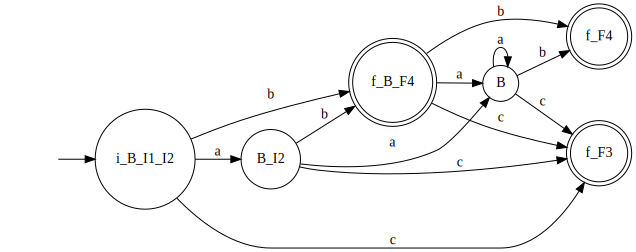

In [19]:
dotObj_dfa(dfa1)

### Obtain min_dfa1 through Brzozowski's algorithm's function calls applied to dfa1

### {Answer cells below - show the Brzozowski minimization commands and display min_dfa1}

In [20]:
min_dfa1 = nfa2dfa(rev_dfa(nfa2dfa(rev_dfa(dfa1))))

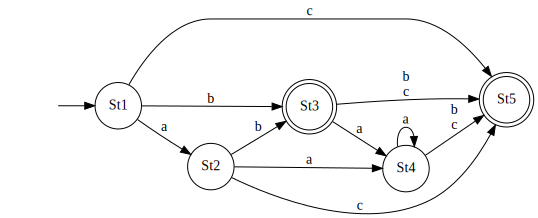

In [21]:
dotObj_dfa(min_dfa1, FuseEdges=True)

### Now, check for language equivalence and isomorphism.

### {Answer cells below - show checks for langeq_dfa and iso_dfa}

In [22]:
langeq_dfa(dfa1, min_dfa1)

True

In [23]:
iso_dfa(dfa1, min_dfa1)

False

### Here, document isomorphism, describing the Wikipedia article's notion of isomorphism between two graphs G and H. Explain why such a function "f" that establishes the isomorphism does not exist between dfa1 and min_dfa1

### {Answer cells below - answer questions on language equivalence and isomorphism}

* Answer steps below
*
* Why are these DFA language equivalent? Do a few checks by hand on six strings in numeric order
*
*
* Why are these DFA not isomorphic? Why does such an "f" function as in the Wikipedia article not exist? Provide reasons in a few steps
*
*
*

## Question 2: Understanding DFA utilities

### {Answer cells below - describe the Jove functions requested}

In [24]:
help(totalize_dfa)
help(dotObj_dfa_w_bh)
help(comp_dfa)

Help on function totalize_dfa in module jove.Def_DFA:

totalize_dfa(D)
    In : Partially consistent DFA
    Out: A consistent DFA 
    Given a partially specified DFA, make it total by 
    transitioning to state BH wherever the incoming Delta 
    has gaps. The returned DFA is structurally consistent.

Help on function dotObj_dfa_w_bh in module jove.DotBashers:

dotObj_dfa_w_bh(D, FuseEdges=False, dfaName='do_', STATENAME_MAXSIZE=20)
    In : D (DFA : partially consistent, states shrunk)
         dfaName (string)
         STATENAME_MAXSIZE : number
    Out: A dot object. 
    Generate a dot object representing the automaton. 
    Do not suppress "black-hole states".

Help on function comp_dfa in module jove.Def_DFA:

comp_dfa(D)
    In : D (DFA : partially consistent)
    Out: Consistent DFA that is D's complement.
    Before we begin, make D total. This is crucial, 
    as the black-hole states if any
    become "white-hole" states in the complemented DFA 
    (i.e. really turn into


* Learn about a few DFA utilities such as totalize_dfa and dotObj_dfa_w_bh. Understand the behavior of comp_dfa. Use "help(...)" and read the documentation. Explanations of your understanding to be provided below under "Part a".

* Extract an RE by inspecting nfa1 and write it down as RE1_hand. Do this under "Part b" below.

* Understand the function del_gnfa_states via its help command. Do this under "Part c" below.

### {Answer cells below -  Do the steps below and then obtain pdfa1 and display it}

### Part a: 

* First remove all BH moves from dfa1, calling it the "partial dfa1" or pdfa1. Display the DFA using dotObj_dfa_w_bh(...).


* Then apply the totalize command and save the result in tot_pdfa1. Display the DFA using dotObj_dfa_w_bh(...). Use the "FuseEdges" option. 

* 

* What difference do you observe in the displayed DFA after "totalize"? Write in a few sentences in the space below.

* The main and only difference is all of the BH moves that were present in the earlier DFA dfa1 are present in tot_pdfa1, but are not present in pdfa1.  The reason for this is we removed all of the BH moves from pdfa1 (the moves that, for a state, go to nothing [a black hole] because that state doesn't have a move defined for that value or Delta).  All totalize() does is look through the entire DFA and, for every move from a state that is undefined, have that state go to a BH state and introduce that state into the machine.  Basically, all totalize does is have any undefined move go to BH, which in this case meant putting the exact states we removed to make pdfa1 back in place and this time explicitly show those transitions.

In [25]:
# DFA of nfa1

pdfa1 = md2mc('''DFA

i_B_I1_I2 : a -> B_I2    !! {FILL HERE} the DFA moves, writing short comments almost per-line  
i_B_I1_I2 : b -> f_B_F4
i_B_I1_I2 : c -> f_F3

B_I2 : a -> B
B_I2 : b -> f_B_F4
B_I2 : c -> f_F3

f_B_F4 : a -> B
f_B_F4 : b -> f_F4
f_B_F4 : c -> f_F3

B : a -> B
B : b -> f_F4
B : c -> f_F3


''')

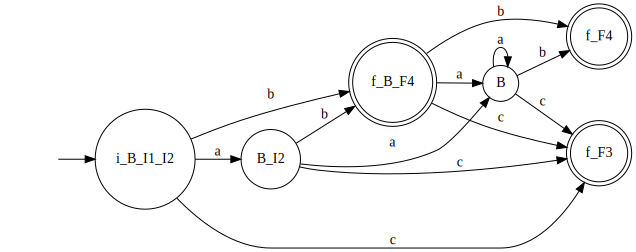

In [26]:
dotObj_dfa_w_bh(pdfa1)

In [27]:
tot_pdfa1 = totalize_dfa(pdfa1)

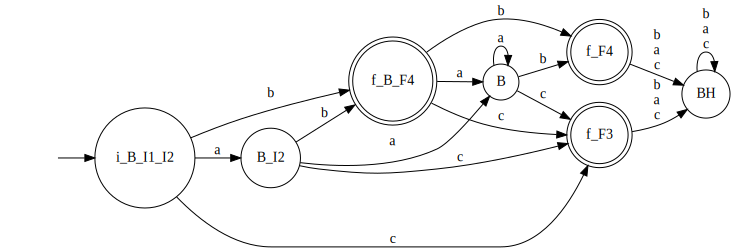

In [30]:
dotObj_dfa_w_bh(tot_pdfa1, FuseEdges=True)

### {Answer cells below - answer questions about comp_dfa}

## Understanding comp_dfa

Complementing a DFA is supported by the function comp_dfa. Complement pdfa1 using this command and assign it to comp_pdfa1. Compare the result of displaying comp_pdfa1 , pdfa1 and tot_pdfa1. What differences do you see? Explain in 3 bullets.

* pdfa1 and tot_pdfa1 have these similarities and differences: {Briefly describe}

 * The first difference I noticed is that the two DFA, comp_pdfa1 and tot_pdfa1, have the exact same number of and kind of states, while pdfa1 is missing the BH state entirely (which is to be expected) 

* comp_pdfa1 and tot_pdfa1 have these similarities and differences: {Briefly describe}

 * The next is that the DFA pdfa1 and tot_pdfa1 have the exact same types of states, namely that B_I2 i_B_I1_I2 and B are all normal states, and f_B_F4 f_F3 and f_F4 are all final states, but in the complemented DFA these normal states are all final states, including the BH state, and the final states are all normal states, with i_B_I1_I2 being an initial state in the pdfa1 and tot_pdfa1 while it is an initial-final state in the complement.
 
* comp_pdfa1 and pdfa1 have these similarities and differences: {Briefly describe}

 * Aside from what I've already described, there don't seem to be any other differences as all 3 DFA have the same number of states and the same number of and kinds of transitions out of those states throughout the machines.

In [31]:
comp_pdfa1 = comp_dfa(pdfa1)

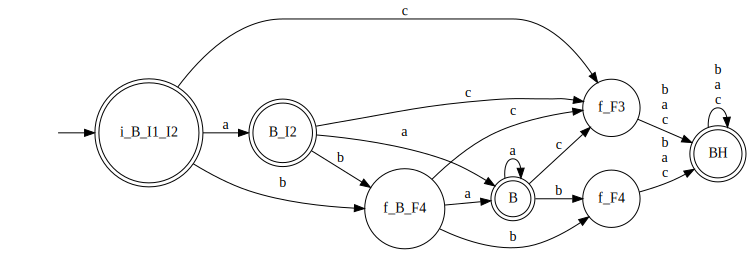

In [32]:
dotObj_dfa_w_bh(comp_dfa(pdfa1), FuseEdges="True")

In [36]:
tot_pdfa1 = totalize_dfa(pdfa1)

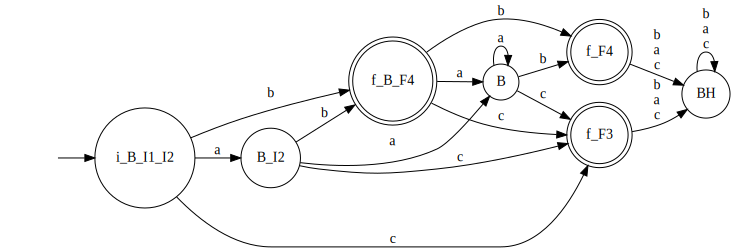

In [37]:
dotObj_dfa_w_bh(tot_pdfa1, FuseEdges=True)

## Question 3: understanding re2nfa

### nfa1 is repeated below for your convenience

In [38]:
# Given NFA

nfa1 = md2mc('''NFA
I1 : '' -> B
I1 : a  -> I2

I2 : c  -> F3
I2 : b  -> B

B : a  -> B
B : b  -> F4
B : c  -> F3


''')


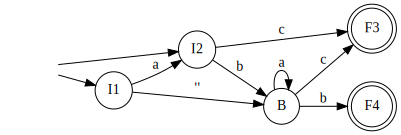

In [39]:
dotObj_nfa(nfa1)

##  {IMPORTANT Answer cells below - RE from nfa1 by inspection and the checks asked}

### Part b: Obtain an RE by looking at nfa1

* Follow all paths

* Summarize the paths in your head, using the Star operator suitably




In [83]:
# RE1_hand = " ... your RE here... "

RE1_hand = " a*b + aba*b + a*c + aba*c + c + ac + ba*b + ba*c "
# I can't figure out how to rewrite or algebra through the expression that get's something more compact than all the possible paths to a final state, which is just what this is.
# Needs a lot of work to fix, doesn't look like the original nfa

### Part c : Obtain a DFA out of this RE and confirm it appears OK

### we will later check RE1_hand against RE1_automated -- that will catch mistakes if any !!


In [84]:
DFA_RE1_hand = min_dfa(nfa2dfa(re2nfa(RE1_hand)))

Generating LALR tables


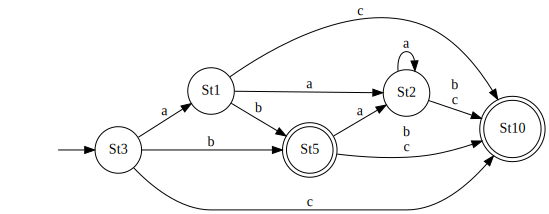

In [85]:
dotObj_dfa(DFA_RE1_hand, FuseEdges=True)

##  Question 4: Understanding del_gnfa_states

### Part d: Understand del_gnfa_states via help

*Run help( del_gnfa_states )

* Now, FULLY understand how to specify its arguments.

* YOU CAN FIND MULTIPLE USES OF THIS FUNCTION IN VARIOUS NOTEBOOKS. Please study these notebooks and understand how it works.

* In particular, note that you can specify a state elimination order to del_gnfa_states. Youll get to understand and use this in 
 
### To do this you need a GNFA and so understand the call mk_gnfa also

In [53]:
help(mk_gnfa)

Help on function mk_gnfa in module jove.Def_NFA2RE:

mk_gnfa(Nin)
    Input : Nin, an NFA.
    Output: G, a GNFA, with at-most one transition from any
            state p to a state q.??true any more?? Note that we have created
            an NFA (G+NFA), and so one state can have a transition
            to A SET OF STATES !!
    Method: Add a new set of states {Real_I} and another, {Real_F}.
            Move from state Real_I to the NFA's initial set of states
            upon epsilon, and from each state in NFA's F to Real_F.
            Return this GNFA.
            We will keep GNFA's alphabet implicit (whatever edge
            labels exist will be deemed to be in the alphabet.)



In [54]:

help(del_gnfa_states) 

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



### Perform del_gnfa_states on the gnfa obtained from nfa1

In [55]:
(Gfinal, DO, RE1_automated) = del_gnfa_states(mk_gnfa(nfa1))

**** Eliminating state F3 ****
**** Eliminating state B ****
**** Eliminating state I2 ****
**** Eliminating state I1 ****
**** Eliminating state F4 ****


### {Answer cells : Obtain RE1_automated and check it is equivalent to RE1_hand by isomorphism of min_DFAs}

In [56]:
RE1_automated

'(((((((a (b ((a)* b))) + ((a)* b)) + ((a)* b)) + (b ((a)* b))) + (b ((a)* b))) + (((((a (((b ((a)* c)) + c) + c)) + ((a)* c)) + ((a)* c)) + (((b ((a)* c)) + c) + c)) + (((b ((a)* c)) + c) + c))) + (((((a (((b ((a)* c)) + c) + c)) + ((a)* c)) + ((a)* c)) + (((b ((a)* c)) + c) + c)) + (((b ((a)* c)) + c) + c)))'

In [57]:
DFA_RE1_automated = min_dfa(nfa2dfa(re2nfa(RE1_automated)))

Generating LALR tables


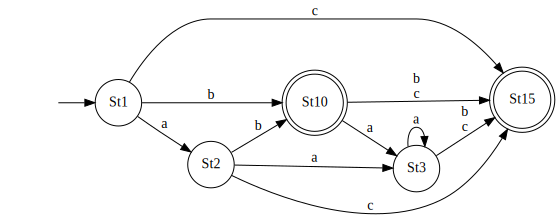

In [58]:
dotObj_dfa(DFA_RE1_automated, FuseEdges=True)

## {IMPORTANT Answer cell below: this iso_dfa must pass -- if not, debug RE1_hand !! }

In [86]:
iso_dfa(DFA_RE1_hand, DFA_RE1_automated)

True

### Part e: List DO[0], DO[1], ... and also GFinal



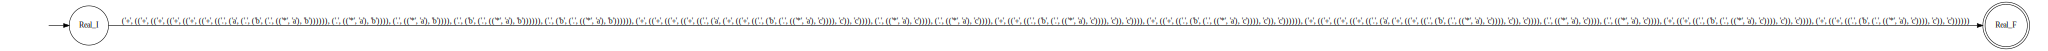

In [87]:
dotObj_gnfa(Gfinal)

### {Answer cells below: Explain how DO[0], DO[1] etc  correspond with the NFA to RE conversion you learned. Explain each DO[n] in some bullets

* 
* DO[0] captures no states, as this is the first stage all that has happened is a GNFA was built from the NFA and the introduced G.

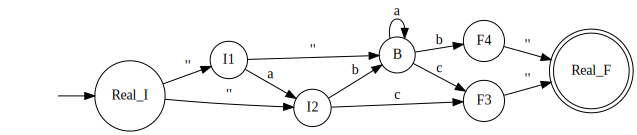

In [88]:
DO[0]

* 
* DO[1] captures state F3, connecting states B and I2 to Real_F with c.

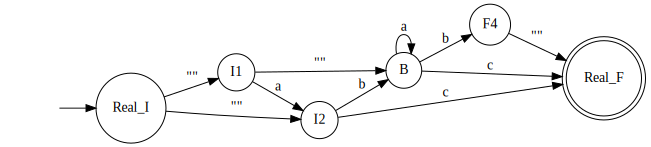

In [89]:
DO[1]

* 
* DO[2] captures state B, creating paths from I1 and I2 to F4 and from I1 and I2 to Real_F

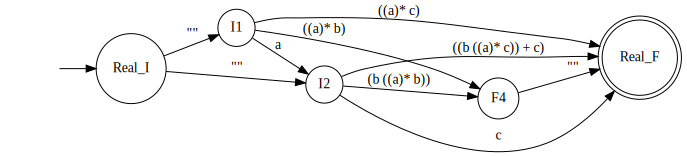

In [90]:
DO[2]

* 
* DO[3] captures state I2, resulting in multiple paths from I1 to Real_F and multiple paths from I1 to F4.

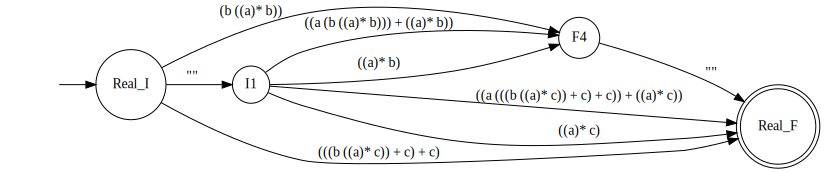

In [91]:
DO[3]

* 
* DO[4] captures state I1, merging the various paths you could take to get from I1 to Real_F and the paths you could take to get to F4, leaving two paths to F4 and Real_F each.

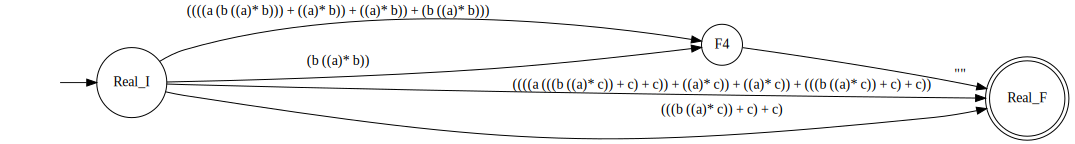

In [92]:
DO[4]

* 
* DO[5] captures state F4, merging the two paths to it together leaving 3 paths to Real_F from Real_I instead of 4.

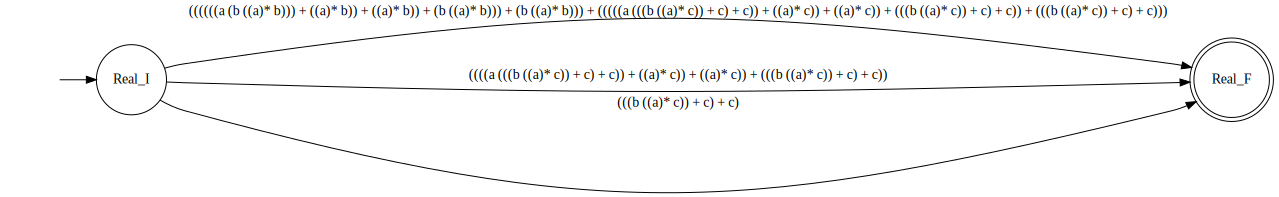

In [93]:
DO[5]

* 
* In the last stage, Gfinal, the 3 paths to Real_F are collapsed into 1 singular expression, yielding the (very large) regular expression that represents the original NFA.

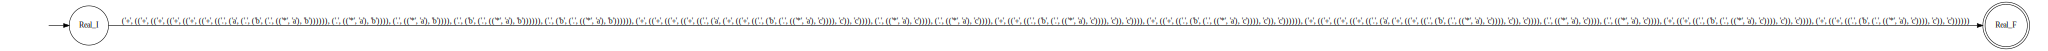

In [94]:
dotObj_gnfa(Gfinal)

# END
